21.03.22 ML_DL Tensorflow Ver.1 사용해서 분석하기

# Tensorflow_Ver.1에서의 ML_DL

## tensorflow v2.x에서 v1 버전 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v1 버전으로 사용

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
# tensor=data(상수, 변수), 연산
# node1 상수 tensor 선언
node1 = tf.constant('Hello, TensorFlow') 
# graph(computational grahp를 생성)
sess = tf.Session()
# print(node1)
print(sess.run(node1)) # b가 의미하는 것은 byte literals
# http://stackoverflow.com/questions/6269765
print(sess.run(node1).decode())

b'Hello, TensorFlow'
Hello, TensorFlow


In [13]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
# node3 = node1 + node2
node3 = tf.add(node1, node2)
# computational graph 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


### Tensorflow
- 1. 그래프 정의
- 2. sess = tf.Session()를 실행
- 3. sess.run()을 통해 값을 확인할 수 있음

In [14]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [15]:
data = [1.,2.,3.,4.]
m = tf.reduce_mean(data) # reduce_mean 평균값 연산
sess = tf.Session()
print(sess.run(m))

2.5


## tensorflow v1을 이용한 linear regression을 구현

### 독립변수 x가 한개

In [16]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (tensorflow v2. fit()함수)
'''
for step in range(1, 6001):
    sess.run(train)
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, 
                        sess.run(cost), sess.run(W), sess.run(b)))
'''
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val))

200번째 cost:0.16060547530651093, W값:[0.53566563], b값:[1.0555413]
400번째 cost:0.06132699176669121, W값:[0.7130697], b값:[0.6522602]
600번째 cost:0.0234176367521286, W값:[0.8226944], b값:[0.40305716]
800번째 cost:0.0089420136064291, W값:[0.89043593], b값:[0.2490649]
1000번째 cost:0.0034144979435950518, W값:[0.93229604], b값:[0.15390699]
1200번째 cost:0.0013038228498771787, W값:[0.958163], b값:[0.09510526]
1400번째 cost:0.0004978631623089314, W값:[0.97414726], b값:[0.05876932]
1600번째 cost:0.0001901081996038556, W값:[0.98402464], b값:[0.03631579]
1800번째 cost:7.259245467139408e-05, W값:[0.99012834], b값:[0.02244088]
2000번째 cost:2.7718602723325603e-05, W값:[0.9938999], b값:[0.01386703]
2200번째 cost:1.058443831425393e-05, W값:[0.9962304], b값:[0.00856901]
2400번째 cost:4.0415648072666954e-06, W값:[0.99767065], b값:[0.00529513]
2600번째 cost:1.5433612361448468e-06, W값:[0.99856055], b값:[0.00327211]
2800번째 cost:5.894659693694848e-07, W값:[0.9991104], b값:[0.00202214]
3000번째 cost:2.25181608470848e-07, W값:[0.9994501], b값:[0.00124983]
320

In [17]:
sess.run([W,b])

[array([0.99999774], dtype=float32), array([4.5229417e-06], dtype=float32)]

In [18]:
w_, b_ = sess.run([W,b])

In [19]:
print("최종적으로 나온 회귀식 : H={}*x + {}".format(w_[0], b_[0]))

최종적으로 나온 회귀식 : H=0.9999977350234985*x + 4.52294170827372e-06


In [20]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(100.0, name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 4000번 학습 (tensorflow v2. fit()함수)
for step in range(1, 4001):
    W_val, b_val = sess.run([W, b])
    if step%200 == 1:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val[0]))
    sess.run(train)

1번째 cost:3.2443481495086912e-12, W값:100.0, b값:0.7834677696228027
201번째 cost:3.2443481495086912e-12, W값:10.740489959716797, b값:-22.142423629760742
401번째 cost:3.2443481495086912e-12, W값:7.019031524658203, b값:-13.682674407958984
601번째 cost:3.2443481495086912e-12, W값:4.719395637512207, b값:-8.455060005187988
801번째 cost:3.2443481495086912e-12, W값:3.2983603477478027, b값:-5.2247138023376465
1001번째 cost:3.2443481495086912e-12, W값:2.4202468395233154, b값:-3.228555202484131
1201번째 cost:3.2443481495086912e-12, W값:1.8776261806488037, b값:-1.9950504302978516
1401번째 cost:3.2443481495086912e-12, W값:1.5423195362091064, b값:-1.23281991481781
1601번째 cost:3.2443481495086912e-12, W값:1.3351209163665771, b값:-0.7618085741996765
1801번째 cost:3.2443481495086912e-12, W값:1.2070844173431396, b값:-0.47075146436691284
2001번째 cost:3.2443481495086912e-12, W값:1.1279654502868652, b값:-0.2908955514431
2201번째 cost:3.2443481495086912e-12, W값:1.0790749788284302, b값:-0.17975597083568573
2401번째 cost:3.2443481495086912e-12, W값:1.048

### predict를 하기 위한 placeholder 이용

In [21]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a+b)
ab = a + b
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [22]:
sess.run(ab, feed_dict={a : [1,2,3],
                        b : [10,10,10]})

array([11., 12., 13.], dtype=float32)

In [23]:
sess.run(ab, feed_dict={a : np.array([1,2,3]),
                        b : np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [24]:
# 그래프 실행 단계에서 값을 던져줌
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1 + node2
sess = tf.Session()
result = sess.run(adder_node, feed_dict={node1: input("node1값은 "),
                                         node2: input("node2값은 ")})
print(result)

node1값은 20
node2값은 50
70.0


In [25]:
# training data set (H = 2x + 3)
x_data = [1, 2, 3]
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째:cost-{}, W-{}, b-{}".format(step, 
                                                cost_val, W_val, b_val))

200번째:cost-0.42176052927970886, W-[2.7524605], b-[1.2894806]
400번째:cost-0.16104905307292938, W-[2.4649749], b-[1.9430026]
600번째:cost-0.06149633228778839, W-[2.2873263], b-[2.3468401]
800번째:cost-0.023482421413064003, W-[2.1775503], b-[2.5963862]
1000번째:cost-0.008966698311269283, W-[2.1097152], b-[2.7505915]
1200번째:cost-0.0034239173401147127, W-[2.0677974], b-[2.8458805]
1400번째:cost-0.0013074427843093872, W-[2.0418952], b-[2.9047632]
1600번째:cost-0.0004992260946892202, W-[2.025888], b-[2.9411502]
1800번째:cost-0.00019061058992519975, W-[2.0159967], b-[2.963636]
2000번째:cost-7.278503471752629e-05, W-[2.0098848], b-[2.977529]
2200번째:cost-2.779375972750131e-05, W-[2.0061085], b-[2.9861138]
2400번째:cost-1.0615384780976456e-05, W-[2.0037751], b-[2.9914186]
2600번째:cost-4.05479204346193e-06, W-[2.0023332], b-[2.9946964]
2800번째:cost-1.5506808495047153e-06, W-[2.0014424], b-[2.9967206]
3000번째:cost-5.929527446824068e-07, W-[2.000893], b-[2.9979715]
3200번째:cost-2.2741066629805573e-07, W-[2.0005527], b-[

In [26]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [27]:
# 예측해보기(predict)
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [28]:
sess.run(H, feed_dict={x: np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## scale이 다른 데이터들의 linear regression을 구현

In [29]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [30]:
# training data set (datadml scale이 다르면 학습 결과가 ?)
x_data = [1, 2, 5, 8,10]
y_data = [5,15,68,80,95]

# placeholder를 설정
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train     = optimizer.minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val = sess.run([train, cost, W], feed_dict={x:x_data,
                                                              y:y_data})
    if step%200 == 0 :
        print("{}번째 cost-{}, W-{}".format(step, cost_val, W_val))

200번째 cost-79.16194152832031, W-[10.123303]
400번째 cost-79.14152526855469, W-[10.148789]
600번째 cost-79.13963317871094, W-[10.156509]
800번째 cost-79.13946533203125, W-[10.158848]
1000번째 cost-79.13944244384766, W-[10.159556]
1200번째 cost-79.13945007324219, W-[10.159771]
1400번째 cost-79.13947296142578, W-[10.159835]
1600번째 cost-79.13946533203125, W-[10.159855]
1800번째 cost-79.13946533203125, W-[10.159861]
2000번째 cost-79.13946533203125, W-[10.159862]
2200번째 cost-79.13945770263672, W-[10.1598625]
2400번째 cost-79.13945770263672, W-[10.1598625]
2600번째 cost-79.13945770263672, W-[10.1598625]
2800번째 cost-79.13945770263672, W-[10.1598625]
3000번째 cost-79.13945770263672, W-[10.1598625]
3200번째 cost-79.13945770263672, W-[10.1598625]
3400번째 cost-79.13945770263672, W-[10.1598625]
3600번째 cost-79.13945770263672, W-[10.1598625]
3800번째 cost-79.13945770263672, W-[10.1598625]
4000번째 cost-79.13945770263672, W-[10.1598625]
4200번째 cost-79.13945770263672, W-[10.1598625]
4400번째 cost-79.13945770263672, W-[10.1598625]
46

In [31]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128414], dtype=float32)]

In [32]:
# 예측을 할 수 있으나 cost가 너무 큰 값이라 믿을 수 없음
sess.run(H, feed_dict={x:10})

array([101.36734], dtype=float32)

In [33]:
# 예측이 제대로 안 되는 이유 : GradientDescentOptimizer에서 local최소값을 만나면
# global 최소값이 따로 있어도 멈춤

## 독립변수 x 가 여러개인 linear regression
- scale이 다른 x, y값(교안 pt.28)

In [34]:
# training data set
# x_data = [[73,80,75],
#           [93,88,93],
#           [89,91,90],
#           [96,98,100],
#           [73,66,70]]
# y_data = [[152],[185],[180],[196],[142]]
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:5.384036064147949
6000번째 cost:2.7667670249938965
9000번째 cost:2.0412168502807617
12000번째 cost:1.7163352966308594
15000번째 cost:1.4949947595596313
18000번째 cost:1.3153293132781982
21000번째 cost:1.1623274087905884
24000번째 cost:1.030480980873108
27000번째 cost:0.916580855846405
30000번째 cost:0.8181264996528625
33000번째 cost:0.7330058217048645
36000번째 cost:0.659415066242218
39000번째 cost:0.5957870483398438
42000번째 cost:0.5407823324203491
45000번째 cost:0.49321794509887695
48000번째 cost:0.45209628343582153
51000번째 cost:0.4165400564670563
54000번째 cost:0.3857869505882263
57000번째 cost:0.35920169949531555
60000번째 cost:0.33621323108673096


## Ozone량 예측 예제

In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

In [36]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost {}".format(step, cost_val))

3000번째 cost 513.0557250976562
6000번째 cost 469.7020568847656
9000번째 cost 464.59954833984375
12000번째 cost 463.9767150878906
15000번째 cost 463.8784484863281
18000번째 cost 463.8416442871094
21000번째 cost 463.81219482421875
24000번째 cost 463.78350830078125
27000번째 cost 463.7548828125
30000번째 cost 463.726318359375
33000번째 cost 463.69781494140625
36000번째 cost 463.6693115234375
39000번째 cost 463.6408386230469
42000번째 cost 463.6124267578125
45000번째 cost 463.58404541015625
48000번째 cost 463.5556335449219
51000번째 cost 463.52734375
54000번째 cost 463.4990539550781
57000번째 cost 463.47064208984375
60000번째 cost 463.4424133300781


In [37]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [38]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.536865]], dtype=float32)

In [ ]:
# scale 맞추는 방법 : normalization(많이 씀), standardization(표준화)
#                   X - Xmin
# normalization = ──────────────
#                  Xmax - Xmin
# 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler 이용)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
# 의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [39]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정(standardization)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
data['Ozone'] = (data['Ozone']- data['Ozone'].mean())/data['Ozone'].std()
data['Solar.R'] = (data['Solar.R']- data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind']- data['Wind'].mean())/data['Wind'].std()
data['Temp'] = (data['Temp']- data['Temp'].mean())/data['Temp'].std()

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

 3000번째 cost 5.585353374481201
 6000번째 cost 4.727122783660889
 9000번째 cost 4.014029026031494
12000번째 cost 3.421133518218994
15000번째 cost 2.9278299808502197
18000번째 cost 2.5170857906341553
21000번째 cost 2.1748111248016357
24000번째 cost 1.8893628120422363
27000번째 cost 1.651094913482666
30000번째 cost 1.4520275592803955
33000번째 cost 1.2855541706085205
36000번째 cost 1.1461962461471558
39000번째 cost 1.0294148921966553
42000번째 cost 0.9314462542533875
45000번째 cost 0.849165141582489
48000번째 cost 0.7799777984619141
51000번째 cost 0.7217298746109009
54000번째 cost 0.67262864112854
57000번째 cost 0.6311833262443542
60000번째 cost 0.5961531400680542


In [42]:
# predict 하려면 scale이 맞춰진 데이터로 predict를 하고 결과를 다시 scale조정

In [43]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('scale 조정 전 데이터 : \n', np.c_[x_data[:3], y_data[:3]])
# scale 조정(1) sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() # scale_x : x_data를 scale조정할 객체
# x_data에 대한 설정을 잡는 부분 ; x_data 3개 컬럼에 대한 max, min 설정
scale_x.fit(x_data) 
x_data = scale_x.transform(x_data) # scale 조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data
print('scale 조정된 데이터 :\n', np.c_[x_data[:3], y_data[:3]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

scale 조정 전 데이터 : 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale 조정된 데이터 :
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
 3000번째 cost 5.172966957092285
 6000번째 cost 4.213175296783447
 9000번째 cost 3.436371326446533
12000번째 cost 2.8076627254486084
15000번째 cost 2.298795223236084
18000번째 cost 1.8869144916534424
21000번째 cost 1.5535236597061157
24000번째 cost 1.2836648225784302
27000번째 cost 1.0652098655700684
30000번째 cost 0.8883465528488159
33000번째 cost 0.7451657652854919
36000번째 cost 0.6292188763618469
39000번째 cost 0.5353329181671143
42000번째 cost 0.45928066968917847
45000번째 cost 0.3976818025112152
48000번째 cost 0.3477550446987152
51000번째 cost 0.30730268359184265
54000번째 cost 0.27450308203697205
57000번째 cost 0.24789655208587646
60000번째 cost 0.22630435228347778


In [44]:
# 8. prediction
input_data = np.array([[118., 8.,72.]])

In [45]:
scale_input_data = scale_x.transform(input_data)
print('원 데이터 : ', input_data)
print('scale 조정된 데이터 :', scale_input_data)

원 데이터 :  [[118.   8.  72.]]
scale 조정된 데이터 : [[0.33944954 0.30978261 0.375     ]]


In [46]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value)

array([[1.7888327]], dtype=float32)

In [47]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정 : data를 한꺼번에 scale 조정 시 prediction 힘듦
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data),
#                     columns=['Ozone','Solar.R','Wind','Temp'])

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('조정전\n', np.c_[x_data[:2], y_data[:2]])
# scale 조정 : x_data, y_data scale을 따로 따로 - prediction 가능
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n', np.c_[x_data[:2], y_data[:2]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
 3000번째 cost 3.2341034412384033
 6000번째 cost 2.993908643722534
 9000번째 cost 2.7766997814178467
12000번째 cost 2.5800154209136963
15000번째 cost 2.401670455932617
18000번째 cost 2.2397446632385254
21000번째 cost 2.092525005340576
24000번째 cost 1.9585157632827759
27000번째 cost 1.8363834619522095
30000번째 cost 1.7249506711959839
33000번째 cost 1.6231807470321655
36000번째 cost 1.5301156044006348
39000번째 cost 1.4449312686920166
42000번째 cost 1.3668811321258545
45000번째 cost 1.2952933311462402
48000번째 cost 1.2295773029327393
51000번째 cost 1.1691927909851074
54000번째 cost 1.1136664152145386
57000번째 cost 1.0625548362731934
60000번째 cost 1.0154640674591064


In [48]:
input_data = np.array([[118.,8.,72.]])
scaled_input_data = scale_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[52.999905]], dtype=float32)

In [49]:
sess.run([W, b])

[array([[-0.4627602 ],
        [-0.01051542],
        [ 1.2542136 ]], dtype=float32),
 array([0.01908476], dtype=float32)]

##  logistic Regression = Binary classification(2개 그룹 그룹)

w값은  0.12925170068027214 ,b값은  -0.27210884353741516


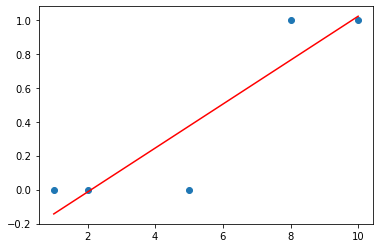

In [50]:
# logistic Regression이 필요한 이유(기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1])
lm = stats.linregress(x, y)
print('w값은 ', lm[0], ',b값은 ', lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

w값은  0.03500583430571762 ,b값은  0.1732788798133022


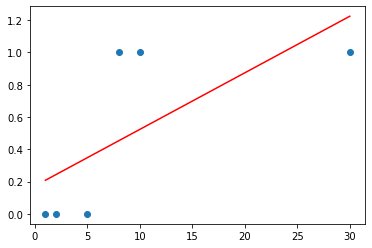

In [51]:
# logistic Regression이 필요한 이유(기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x, y)
print('w값은 ', lm[0], ',b값은 ', lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')